In [1]:
import os
import pandas as pd
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.layers import LSTM, Dropout, Dense
import tensorflow as tf
import numpy as np
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
from keras.models import load_model


def preprocess_data(df):
    """Preprocess data to create sequences for model input.
    
    Args:
        df: The input DataFrame containing features with ou without target.

    Returns:
        np.array: Arrays of input sequences and corresponding target values.
    """
    X = df[FEATURES]
    if TARGET in df.columns:
        Y = df[TARGET]

    X_local, Y_local = [], []
    for start in range(0, len(df) - SEQUENCE_LENGTH, STEP):
        end = start + SEQUENCE_LENGTH
        X_local.append(X[start:end].values)
        if TARGET in df.columns:
            Y_local.append(Y.iloc[end - 1])
    
    if TARGET in df.columns:
        return np.array(X_local), np.array(Y_local)
    else:
        return np.array(X_local), None

D:\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
file_path = 'hypothetical_pump_failure_dataset.csv'

df = pd.read_csv(file_path)

FEATURES = ['vibration_level', 'temperature_C', 'pressure_PSI', 'flow_rate_m3h']
TARGET = 'failure'
SEQUENCE_LENGTH = 10
STEP = 1

scaler = MinMaxScaler()
df[FEATURES] = scaler.fit_transform(df[FEATURES])

<AxesSubplot:>

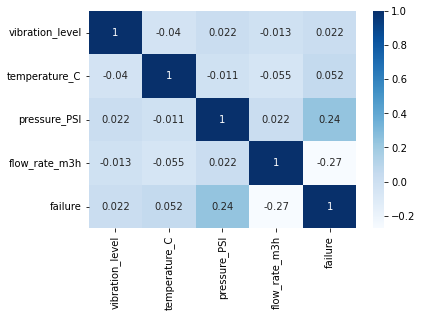

In [3]:
corr = df.iloc[:, 1:].corr()
sb.heatmap(corr, cmap="Blues", annot=True)

In [4]:
corr['failure']

vibration_level    0.021784
temperature_C      0.052382
pressure_PSI       0.235530
flow_rate_m3h     -0.274590
failure            1.000000
Name: failure, dtype: float64

In [5]:
# FEATURES = ['pressure_PSI', 'flow_rate_m3h','temperature_C']

In [6]:
X_local, Y_local = preprocess_data(df)

print(X_local.shape, Y_local.shape)

(990, 10, 4) (990,)


In [7]:
class_weights = compute_class_weight(class_weight = "balanced", classes = np.unique(Y_local), y = Y_local)
class_weights = dict(zip(np.unique(Y_local), class_weights))
class_weights

{0: 0.5260361317747078, 1: 10.10204081632653}

In [8]:
# class_weights = {0: 0.5257510729613734, 1: 20.208333333333334}

In [9]:
model = keras.Sequential()
model.add(LSTM(100, input_shape = (10, 4)))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy"
              , metrics=[keras.metrics.Precision(), keras.metrics.Recall()]
              , optimizer="adam")

# model.summary()

D:\anaconda\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
training_size = int(len(X_local) * 0.7)

X_train, y_train = X_local[:training_size], Y_local[:training_size]
X_test, y_test = X_local[training_size:], Y_local[training_size:]

X_train.shape, y_train.shape,X_test.shape, y_test.shape

((693, 10, 4), (693,), (297, 10, 4), (297,))

In [11]:
model.fit(X_train, y_train, batch_size=32, epochs=150, class_weight=class_weights)

Epoch 1/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7346 - precision: 0.0575 - recall: 0.9826
Epoch 2/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7153 - precision: 0.0691 - recall: 0.2883 
Epoch 3/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6443 - precision: 0.0172 - recall: 0.0520         
Epoch 4/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6662 - precision: 0.0564 - recall: 0.5572 
Epoch 5/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7102 - precision: 0.0610 - recall: 0.4653 
Epoch 6/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5562 - precision: 0.0511 - recall: 0.2350         
Epoch 7/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7093 - precision: 0.0787 - recall: 0.6190 
Epoch 8/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7050 - precision: 0.0645 - recall: 0.8002 
Epoch 9/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6825 - precision: 0.0855 - recall: 0.4351 
Epoch 10/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/st

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4590 - precision: 0.1909 - recall: 0.5052 
Epoch 59/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4732 - precision: 0.1259 - recall: 0.8301         
Epoch 60/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5204 - precision: 0.1793 - recall: 0.7448 
Epoch 61/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4830 - precision: 0.1611 - recall: 0.9089 
Epoch 62/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4751 - precision: 0.1415 - recall: 0.6933         
Epoch 63/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4689 - precision: 0.1783 - recall: 0.7949 
Epoch 64/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4871 - precision: 0.1653 - recall: 0.8874 
Epoch 65/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4364 - precision: 0.2346 - recall: 0.8525 
Epoch 66/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4377 - precision: 0.1801 - recall: 0.8127 
Epoch 67/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2793 - precision: 0.2288 - recall: 0.9773 
Epoch 117/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2113 - precision: 0.3347 - recall: 0.9379 
Epoch 118/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2532 - precision: 0.2674 - recall: 0.9849 
Epoch 119/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2015 - precision: 0.3942 - recall: 0.9764 
Epoch 120/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2147 - precision: 0.2818 - recall: 1.0000 
Epoch 121/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2575 - precision: 0.3226 - recall: 0.9761 
Epoch 122/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2661 - precision: 0.3071 - recall: 0.9864 
Epoch 123/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2136 - precision: 0.3437 - recall: 0.9383 
Epoch 124/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2025 - precision: 0.3144 - recall: 1.0000 
Epoch 125/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss:

In [28]:
y_test_pred = np.where(model.predict(X_test) > 0.8, 1, 0)
report = classification_report(y_test,y_test_pred)
print(report)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       281
           1       0.47      0.44      0.45        16

    accuracy                           0.94       297
   macro avg       0.72      0.70      0.71       297
weighted avg       0.94      0.94      0.94       297



In [47]:
y_test_pred = np.where(model.predict(X_test) > 0.8, 1, 0)
report = classification_report(y_test,y_test_pred)
print(report)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       279
           1       0.41      0.47      0.44        15

    accuracy                           0.94       294
   macro avg       0.69      0.72      0.70       294
weighted avg       0.94      0.94      0.94       294



In [13]:
model.save('my_model.h5')

In [51]:
# confidence threshold
# Control the epochs
# training testing size
# class_weights